In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


2023-05-07 12:19:15.073745: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-07 12:19:15.075320: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 12:19:15.110151: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-07 12:19:15.110651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 12:19:15.656489: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
housing = fetch_california_housing()

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train[5805:].shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

(5805, 8)


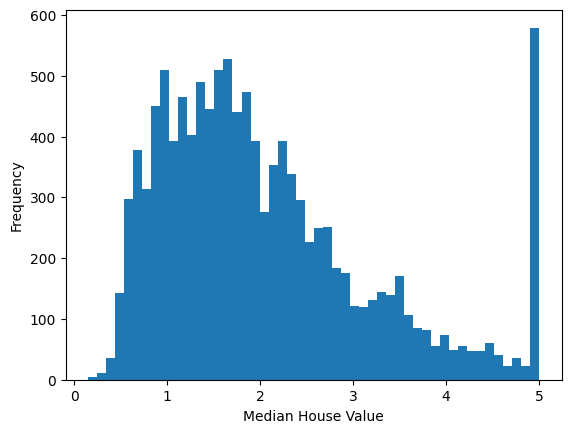

In [5]:
plt.hist(y_train, bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

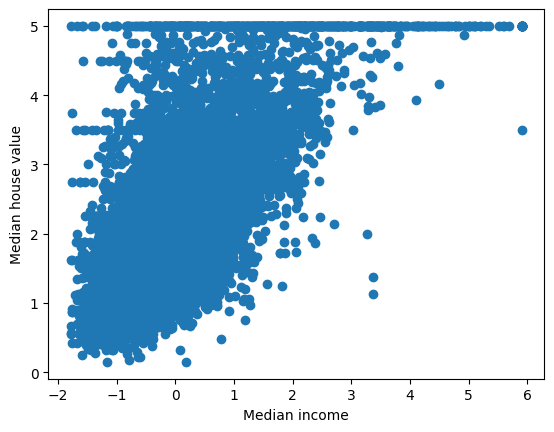

In [6]:
plt.scatter(X_train[:, 0], y_train)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.show()

In [ ]:
### Model

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=[X_train.shape[1]]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 872us/step - loss: 0.8259 - val_loss: 318185.7188
Epoch 2/20
363/363 [==============================] - 0s 879us/step - loss: 0.8167 - val_loss: 37002.6016
Epoch 3/20
363/363 [==============================] - 0s 630us/step - loss: 0.4922 - val_loss: 21208.8496
Epoch 4/20
363/363 [==============================] - 0s 603us/step - loss: 0.4681 - val_loss: 44924.1992
Epoch 5/20
363/363 [==============================] - 0s 603us/step - loss: 0.4551 - val_loss: 45013.2891
Epoch 6/20
363/363 [==============================] - 0s 609us/step - loss: 0.4486 - val_loss: 31948.5195
Epoch 7/20
363/363 [==============================] - 0s 625us/step - loss: 0.4382 - val_loss: 19965.2715
Epoch 8/20
363/363 [==============================] - 0s 635us/step - loss: 0.4312 - val_loss: 21908.4648
Epoch 9/20
363/363 [==============================] - 0s 611us/step - loss: 0.4344 - val_loss: 39625.5625
Epoch 10/20
363/363 [========================

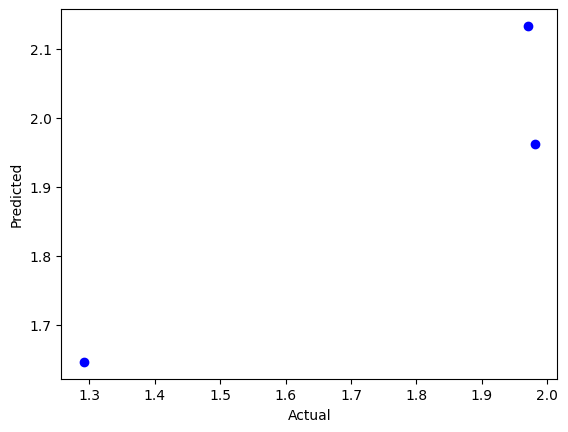

In [8]:
plt.plot(y_test[:3], y_pred, "bo")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [22]:
### Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before,
### to avoid overfitting

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = X_test[3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 774us/step - loss: 0.7780 - val_loss: 288643.2500
Epoch 2/20
363/363 [==============================] - 0s 586us/step - loss: 0.5280 - val_loss: 101222.6328
Epoch 3/20
363/363 [==============================] - 0s 599us/step - loss: 0.4834 - val_loss: 36446.9258
Epoch 4/20
363/363 [==============================] - 0s 664us/step - loss: 0.4604 - val_loss: 2908.9177
Epoch 5/20
363/363 [==============================] - 0s 637us/step - loss: 0.4495 - val_loss: 29341.1953
Epoch 6/20
363/363 [==============================] - 0s 612us/step - loss: 0.4404 - val_loss: 57915.8672
Epoch 7/20
363/363 [==============================] - 0s 624us/step - loss: 0.4400 - val_loss: 6784.7798
Epoch 8/20
363/363 [==============================] - 0s 612us/step - loss: 0.4265 - val_loss: 48561.1875
Epoch 9/20
363/363 [==============================] - 0s 694us/step - loss: 0.4203 - val_loss: 9439.1787
Epoch 10/20
363/363 [==========================

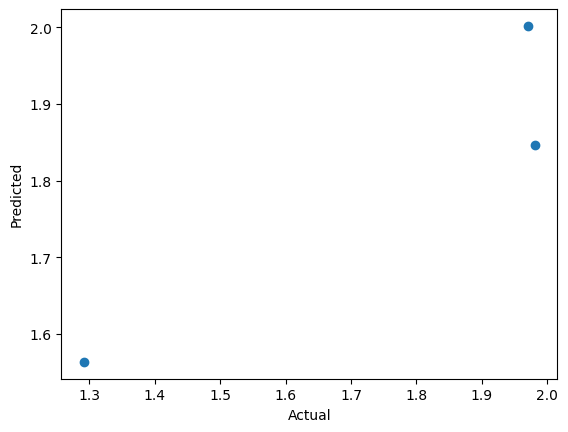

In [10]:
plt.scatter(y_test[:3], y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [29]:
### Building Complex Models Using Functional API // Wide & Deep

In [11]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 30)           930         ['dense_4[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_5[0][0]']            

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="SGD")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = X_test[3]
y_pred = model.predict(X_new)

Epoch 1/20
  1/363 [..............................] - ETA: 1:12 - loss: 2.4090e-07

/home/glcc/Documents/ML/reg_nn/reg_nn_venv/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


363/363 [==============================] - 1s 936us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 2/20
363/363 [==============================] - 0s 695us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 3/20
363/363 [==============================] - 0s 700us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 4/20
363/363 [==============================] - 0s 686us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 5/20
363/363 [==============================] - 0s 673us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 6/20
363/363 [==============================] - 0s 679us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 7/20
363/363 [==============================] - 0s 677us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 8/20
363/363 [==============================] - 0s 639us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 9/20
363/363 [==============================] - 0s 664us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 10/20
363/363 [

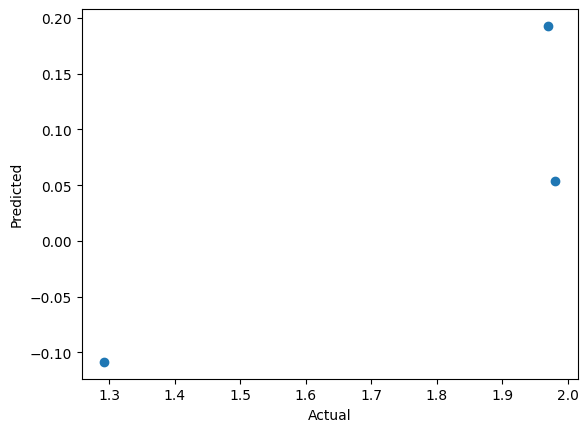

In [14]:
plt.scatter(y_test[:3], y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [20]:
## Wide & Deep with paralell 

In [18]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 30)           930         ['dense_13[0][0]']               
                                                                                            

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
validation_data = ((X_valid_A, X_valid_B), y_valid)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)  
ypred = model.predict((X_new_A, X_new_B))



Epoch 1/20
363/363 [==============================] - 1s 994us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 2/20
363/363 [==============================] - 0s 773us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 3/20
363/363 [==============================] - 0s 789us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 4/20
363/363 [==============================] - 0s 822us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 5/20
363/363 [==============================] - 0s 773us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 6/20
363/363 [==============================] - 0s 778us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 7/20
363/363 [==============================] - 0s 777us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 8/20
363/363 [==============================] - 0s 778us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 9/20
363/363 [==============================] - 0s 875us/step - loss: 2.4588e-07 - val_loss: 2.4705e-07
Epoch 10/2

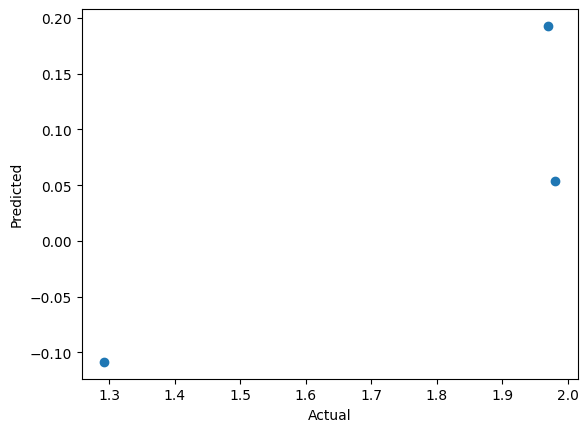

In [31]:
plt.scatter(y_test[:3], y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()